In [10]:
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


We will be using the tmax_all_stations.pickle along with the stats.pickle, tmax_all_stations.pickle contains a list of (stationId, counts of non-nan measurements of each day for that station) pair

In [11]:
import pickle
Data1=pickle.load(open('../../Data/Weather/tmax_all_stations.pickle','r'))
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))


In [37]:
import copy
Data =  copy.copy(Data1)
print Data[0][0]


CA007096621


In [38]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)
    

We count the number of unique stations

In [39]:
unique = len(Data)
print unique

19937


We calculate the overall average of counts of measurement per station, which turns out to be 27.5204792356. This means that on an average a station takes 27.52 measurements per day.

We also plot the average count of measurement per station with day of the year.

overall avg is  27.5204792356


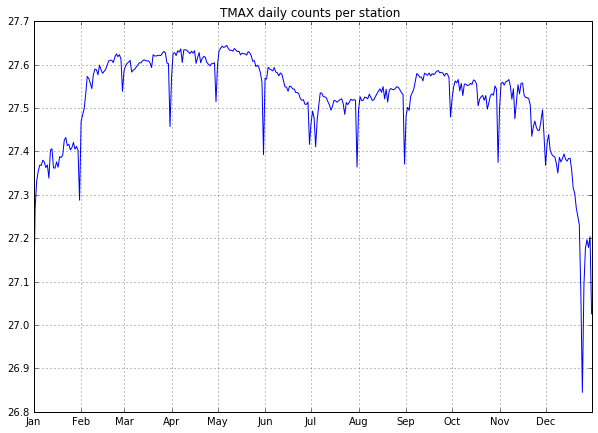

In [40]:
overalldailyavgperstation = sum(STAT['TMAX']['NE'])/unique
overalldailyavgperstation /=365
print "overall avg is ",overalldailyavgperstation
dailyperstation = STAT['TMAX']['NE']/unique
YearlyPlots(dailyperstation,"TMAX daily counts per station ")


We now study the behavior for the last 15 days of december and first 15 days of January

In [41]:
statList = STAT['TMAX']['NE'][-15:].tolist()+STAT['TMAX']['NE'][:15].tolist()
print len(statList)

30


We now calculate the overall average of counts of measurement per station for the period of 30 days(last 15 days of december and first 15 days of January), which turns out to be 27.2666399157. This means that on an average a station takes 27.2666399157 measurements per day over this period. We can clearly see that there is a decrease in the average from 27.52 to 27.2666399157. Also the major drop is on december 24 and jan 31 where it drops to ~ 26.8.

avg for last 15 days of december and first 15 days of january is  27.2666399157


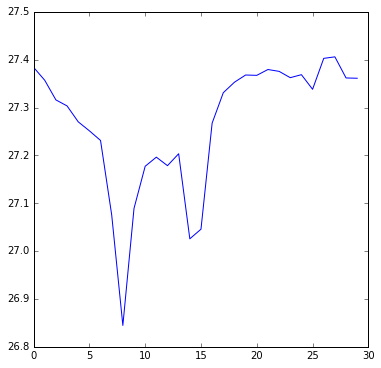

In [42]:
overall30avgperstation = sum(statList)/unique
overall30avgperstation /=30
print "avg for last 15 days of december and first 15 days of january is ",overall30avgperstation
daily30perstation = (numpy.array(statList))/unique
#YearlyPlots(dailyperstation,"TMAX daily counts per station ")
figure(figsize=(6,6))
plot(daily30perstation, '-')
for i in range(0,len(Data)):
    Data[i]= (Data[i][0],Data[i][1][-30:].tolist()+Data[i][1][:15].tolist())

In the above graph, we have plotted the average no. measurements per station over the period of last 15 days of December and first 15 days of January. We can see there is a more prominent decrease around Christmas and New Year. In other days also decrease is there but it is not that prominent.

In [52]:
percentageDecreaseOverall = (overalldailyavgperstation - overall30avgperstation)*100/overalldailyavgperstation
print "overall percentage decrease is ", percentageDecreaseOverall

origData = copy.copy(Data1)
data30 = copy.copy(Data)

stationsdecrease = []
stationsless = []
stationsmore = []
for i in range(0,len(origData)):
    overallavg = sum(origData[i][1])/365
    #overallavg = 27.5
    avg30 = sum(data30[i][1])/45
    if overallavg > avg30:
        stationsdecrease.append(origData[i][0])
        percentage = (overallavg- avg30)*100/overallavg
        if percentage > (percentageDecreaseOverall):
            stationsless.append((origData[i][0],percentage))
    elif overallavg!=0:
        percentage = (avg30-overallavg)*100/overallavg
        if percentage > (percentageDecreaseOverall):
            stationsmore.append((origData[i][0],percentage))
     
print "# of stations which see decrease are ",len(stationsdecrease)
print "# of stations which see more percentage decrease than average percentage decrease are ",len(stationsless)

overall percentage decrease is  0.922365187436
# of stations which see decrease are  4945
# of stations which see more percentage decrease than average percentage decrease are  4717


Final Analysis:
The reason for these lower counts (especially at the beginning and end of the year) is holiday season. The decrease is more prominent around Christmas and New Year than decrease on other days. 

I have done analysis over period of last 15 days of December and first 15 days of January. According to my analysis the number of stations which see a percentage decrease in average count of daily measurements over this period compared to their average count of daily measurements overall the year are (4945*100/19937) = 24.8 %. Also the # of stations which see more % decrease than average % decrease over this period are 4717 which is ~ 23.6 %. So we can see this effect is seen in ~25 % the stations.
Also there are around 24% and 95% stations whose daily count average has dropped on december 24 and jan 31 period respectively.

I think this is not restricted to some particular subset of stations. The main reason I think is some percentage of stations suffers from faults daily and since no human manpower is available to fix these faults on holidays, and at end of the months, so the count of measurements decreases on these days.  Hence nothing can be done to remove this effect.
